# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('../Deep-Learning-Dataset/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('../Deep-Learning-Dataset/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

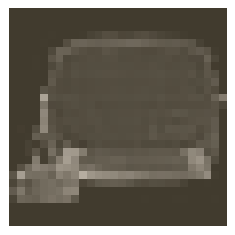

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. **You should include at least one hidden layer**. We suggest you use `ReLU` activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [24]:
# TODO: Define your network architecture here
from collections import OrderedDict
input_size = 784
hidden_sizes = [512, 256, 128]
output_size = 10

class Network(nn.Module):
    def __init__(self, input_size=input_size, hidden_sizes=hidden_sizes, output_size=output_size):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.logits = nn.Linear(hidden_sizes[2], output_size)
    
    def forward(self, tensor):
        '''Foward pass a tensor to the network, and return the logits'''
        tensor = self.fc1(tensor)
        tensor = F.relu(tensor)
        tensor = self.fc2(tensor)
        tensor = F.relu(tensor)
        tensor = self.fc3(tensor)
        tensor = F.relu(tensor)
        logits = self.logits(tensor)

        return logits
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (logits): Linear(in_features=128, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [25]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [26]:
# TODO: Train the network here
epochs = 3
print_every = 40

for e in range(epochs):
    steps = 0
    running_loss = 0
    
    for images, labels in trainloader:
        steps += 1
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad() # 重新歸零gradient, 否則gradient會累積
        
        logits = model.forward(images)
        loss = criterion(logits, labels) # 注意到，這裡的label不需要進行one-hot encode轉換
        loss.backward() # compute gradients
        optimizer.step() # update weights
        
        running_loss = loss.item() # extract loss value
        
        if steps % print_every == 0:
            print('Epoch: {}/{}'.format(e+1, epochs),
                  'Loss: {:.4f}'.format(running_loss))
            
            running_loss = 0

Epoch: 1/3 Loss: 1.0236
Epoch: 1/3 Loss: 0.7402
Epoch: 1/3 Loss: 0.5144
Epoch: 1/3 Loss: 0.9193
Epoch: 1/3 Loss: 0.7539
Epoch: 1/3 Loss: 0.5634
Epoch: 1/3 Loss: 0.7541
Epoch: 1/3 Loss: 0.7438
Epoch: 1/3 Loss: 0.5309
Epoch: 1/3 Loss: 0.9514
Epoch: 1/3 Loss: 0.3884
Epoch: 1/3 Loss: 0.3848
Epoch: 1/3 Loss: 0.5901
Epoch: 1/3 Loss: 0.5443
Epoch: 1/3 Loss: 0.4935
Epoch: 1/3 Loss: 0.3893
Epoch: 1/3 Loss: 0.5671
Epoch: 1/3 Loss: 0.4811
Epoch: 1/3 Loss: 0.4882
Epoch: 1/3 Loss: 0.6194
Epoch: 1/3 Loss: 0.4192
Epoch: 1/3 Loss: 0.3004
Epoch: 1/3 Loss: 0.3628
Epoch: 2/3 Loss: 0.5991
Epoch: 2/3 Loss: 0.5056
Epoch: 2/3 Loss: 0.5193
Epoch: 2/3 Loss: 0.5504
Epoch: 2/3 Loss: 0.3474
Epoch: 2/3 Loss: 0.4602
Epoch: 2/3 Loss: 0.6430
Epoch: 2/3 Loss: 0.3803
Epoch: 2/3 Loss: 0.4439
Epoch: 2/3 Loss: 0.5618
Epoch: 2/3 Loss: 0.4210
Epoch: 2/3 Loss: 0.2077
Epoch: 2/3 Loss: 0.4669
Epoch: 2/3 Loss: 0.7048
Epoch: 2/3 Loss: 0.8354
Epoch: 2/3 Loss: 0.4120
Epoch: 2/3 Loss: 0.4400
Epoch: 2/3 Loss: 0.7104
Epoch: 2/3 Loss:

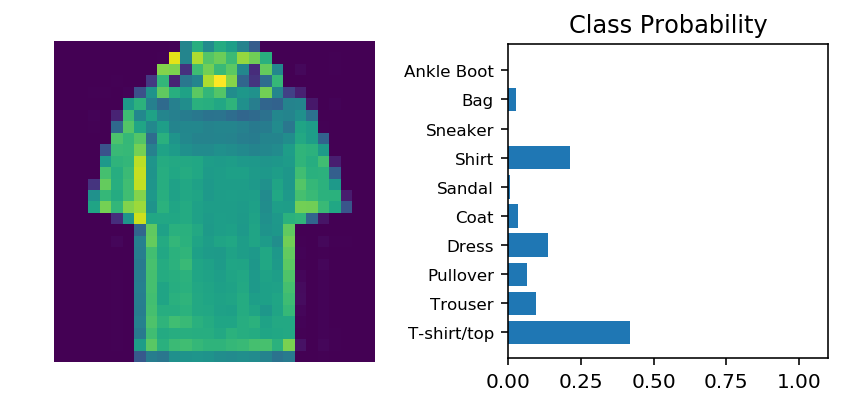

In [36]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[2]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

logits = model.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.